# Objective


The goal is to analyze the causes of road accidents in million-plus cities in India,
identify patterns in causes and outcomes, and visualize the distribution of accidents
based on different categories.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Import Dataset
df = pd.read_csv('Desktop/Unified Data Analysis/Regulatory Affairs of Road Accident Data 2020 India - Regulatory Affairs of Road Accident Data 2020 India/Regulatory Affairs of Road Accident Data 2020 India - Regulatory Affairs of Road Accident Data 2020 India.csv')

In [9]:
df.head()


,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [11]:
df.shape

(9550, 5)

In [13]:
# Check missing Values
df.isnull().sum()

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64

In [15]:
df.dropna(inplace= True)

In [17]:
df.isnull().sum()

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  0
dtype: int64

In [23]:
df.applymap(lambda x : x.strip() if isinstance(x, str) else x)

/var/folders/qg/bz4mdn0x373bzw1csmrhy8vr0000gn/T/ipykernel_46217/1347673375.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x : x.strip() if isinstance(x, str) else x)


,Million_Plus_Cities,Cause_category,Cause_Subcategory,Outcome_of_Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0
...,...,...,...,...,...
9545,Vizaq,Weather,Sunny/Clear,Greviously Injured,561.0
9546,Vizaq,Weather,Sunny/Clear,Minor Injury,252.0
9547,Vizaq,Weather,Sunny/Clear,Persons Killed,176.0
9548,Vizaq,Weather,Sunny/Clear,Total number of Accidents,1207.0


In [25]:
df.columns

Index(['Million_Plus_Cities', 'Cause_category', 'Cause_Subcategory',
       'Outcome_of_Incident', 'Count'],
      dtype='object')

#Exploratory Data Analysis (EDA)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9547 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million_Plus_Cities  9547 non-null   object 
 1   Cause_category       9547 non-null   object 
 2   Cause_Subcategory    9547 non-null   object 
 3   Outcome_of_Incident  9547 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 447.5+ KB


In [121]:
# Top 20 Million_Plus_Cities
city_count = df['Million_Plus_Cities'].value_counts().reset_index().head(20)
city_count.columns = ['Million_Plus_Cities', 'Number_of_Accidents']

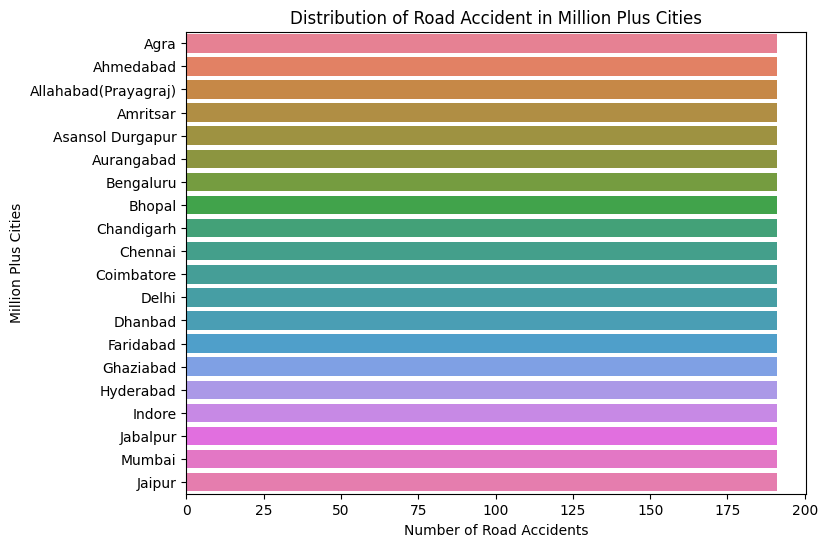

In [123]:
# Plot the distribution of accidents by city
plt.figure(figsize=(8,6))
sns.barplot(x= 'Number_of_Accidents', y='Million_Plus_Cities', data = city_count, hue = 'Million_Plus_Cities')
plt.title("Distribution of Road Accident in Million Plus Cities")
plt.xlabel("Number of Road Accidents")
plt.ylabel("Million Plus Cities")
plt.show()

 A bar plot showing the number of accidents in each million-plus city.

In [38]:
df.head(2)

,Million_Plus_Cities,Cause_category,Cause_Subcategory,Outcome_of_Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0


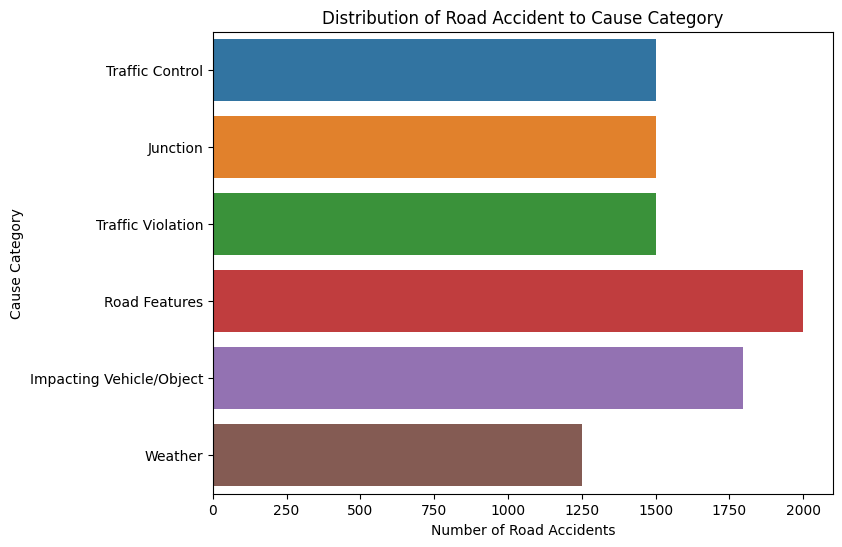

In [100]:
# Plot the distribution of accidents by cause category
plt.figure(figsize=(8,6))
sns.countplot(data=df, y= 'Cause_category', hue = 'Cause_category')
plt.title("Distribution of Road Accident to Cause Category")
plt.xlabel("Number of Road Accidents")
plt.ylabel("Cause Category")
plt.show()

Showing Number of Road Accidents Distribution of Road Accident to Cause Category.

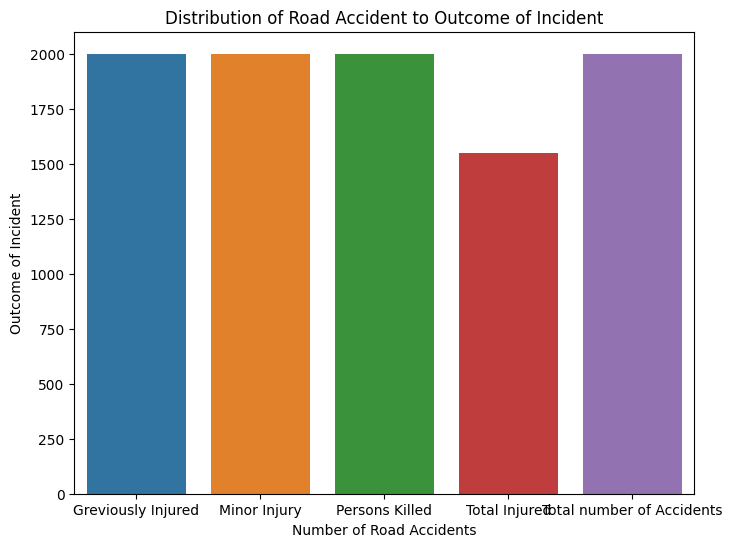

In [99]:
# Detailed analysis by Outcome of incident.
plt.figure(figsize= (8,6))
sns.countplot(data = df, x = 'Outcome_of_Incident',hue = 'Outcome_of_Incident')
plt.title("Distribution of Road Accident to Outcome of Incident")
plt.xlabel("Number of Road Accidents")
plt.ylabel("Outcome of Incident")
plt.show()

Outcome of incident Showing in this Graph.

In [48]:
df['Count'].sum()

np.float64(989333.0)

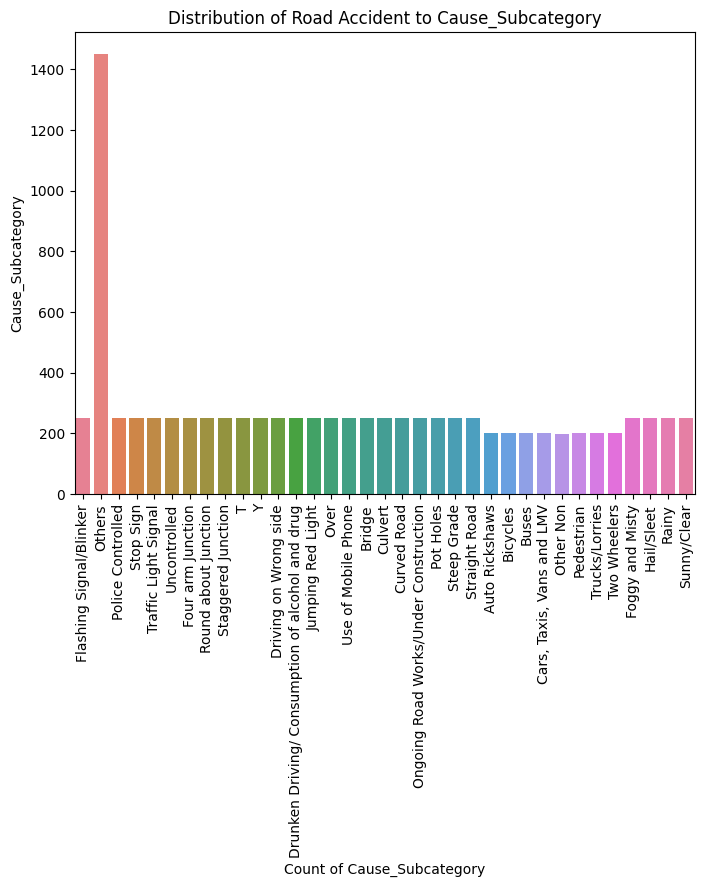

In [98]:
# Distribution of Road Accident to Cause Subcategory.
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'Cause_Subcategory', hue = 'Cause_Subcategory')
plt.xticks(rotation=90)
plt.title("Distribution of Road Accident to Cause_Subcategory")
plt.xlabel("Count of Cause_Subcategory")
plt.ylabel("Cause_Subcategory")
plt.show()

Count of SubCategory Barplot.

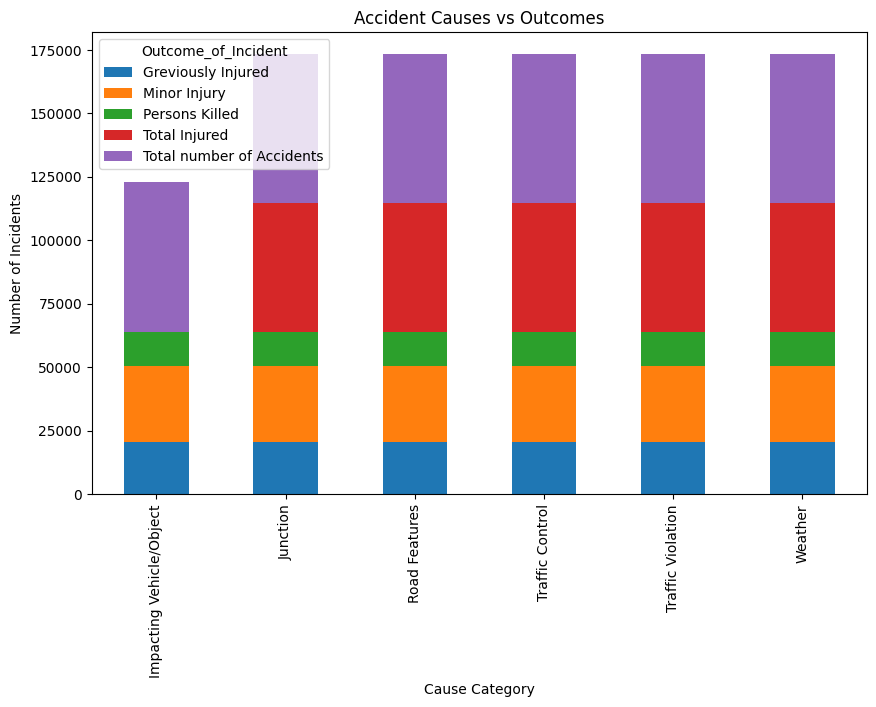

In [60]:
# Grouping by cause category and outcome
outcome_vs_cause = df.groupby(['Cause_category',
'Outcome_of_Incident'])['Count'].sum().unstack()

# Plot the result
outcome_vs_cause.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Accident Causes vs Outcomes')
plt.xlabel('Cause Category')
plt.ylabel('Number of Incidents')
plt.show()

In [63]:
cause_city = df.groupby(['Million_Plus_Cities','Cause_category'])['Count'].sum().unstack()

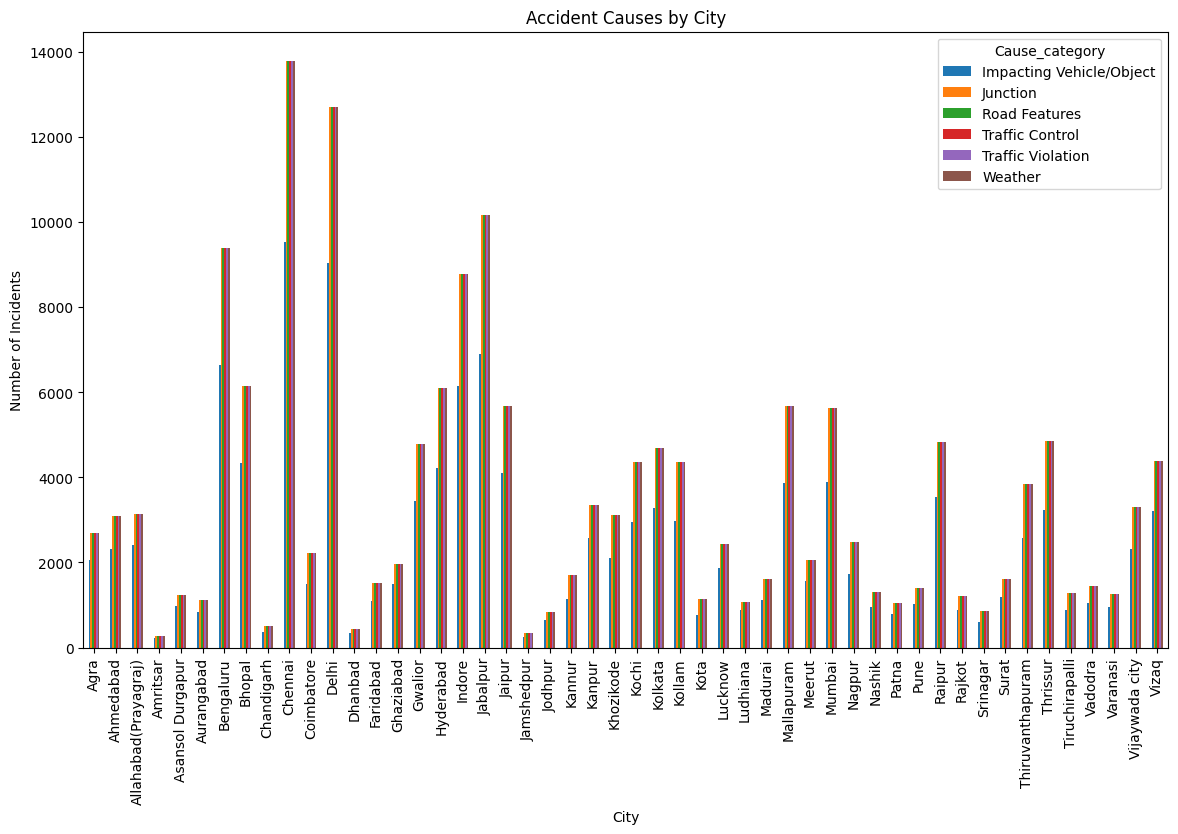

In [67]:
# Accident Causes by City
cause_city.plot(kind='bar', figsize =(14,8))
plt.title('Accident Causes by City')
plt.xlabel('City')
plt.ylabel('Number of Incidents')
plt.show()

Accident Causes by City

In [68]:
df.head()

,Million_Plus_Cities,Cause_category,Cause_Subcategory,Outcome_of_Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [69]:
Cause_Count = df['Cause_category'].value_counts()

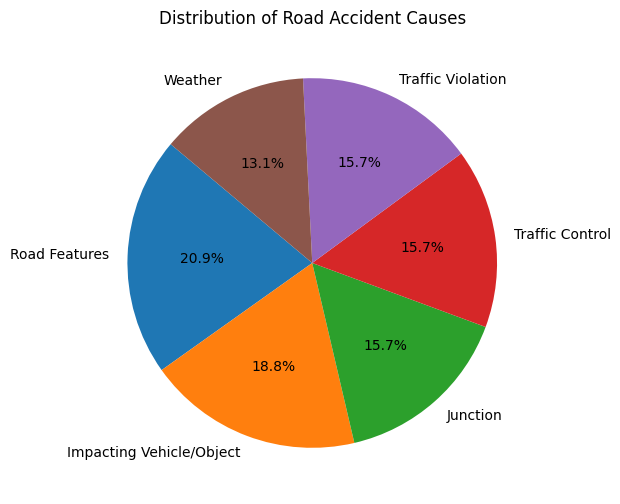

In [75]:
# Distribution of Road Accident Causes Cause_category
plt.figure(figsize=(8,6))
plt.pie(Cause_Count, labels=Cause_Count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Road Accident Causes')
plt.show()

There Road Features and Impacting Vechicle/object more impcat in Accidents


In [94]:
cause_outcome = df['Outcome_of_Incident'].value_counts()
cause_outcome

,count
Outcome_of_Incident,
Total number of Accidents,2000
Greviously Injured,1999
Minor Injury,1999
Persons Killed,1999
Total Injured,1550


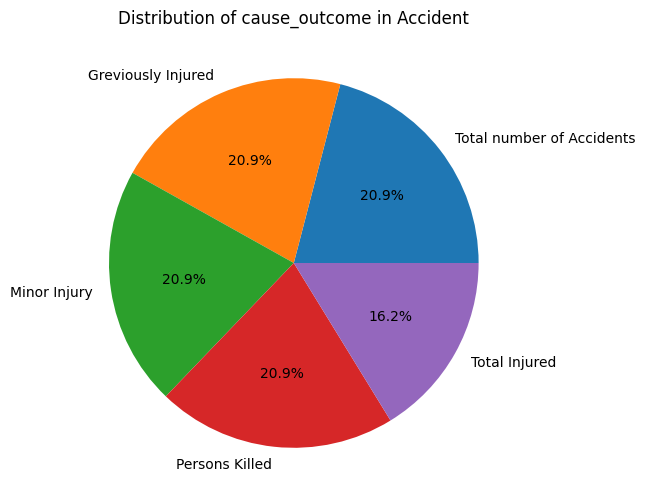

In [96]:
plt.figure(figsize=(8,6))
plt.pie(cause_outcome, labels=cause_outcome.index, autopct='%1.1f%%')
plt.title('Distribution of cause_outcome in Accident')
plt.show()

#Conclusion

**Key Insights**

Urban Areas (Million Plus Cities) contribute a large share to road accidents, probably due to heavy traffic and population density.

Human error factors (like over-speeding and negligence) are a leading cause rather than vehicle faults or environmental factors.

**Recommendations**

Implement stricter traffic regulations and awareness campaigns in highly affected cities.

Focus on driver education programs to reduce accidents caused by human negligence.

Infrastructure improvement in heavy accident zones could help minimize accidents.

The analysis highlights the urgent need for targeted road safety initiatives, especially focused on human behavior and big urban centers.
If actions are taken based on this data, significant reductions in road accidents and fatalities can be achieved.

Would you also like me to write a full report-style conclusion with a summary table, some next action items, or a PowerPoint-style outline you could use for a project or presentation?